In [566]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import string
from statsmodels.formula.api import ols# for running regression
from statsmodels.tools.tools import add_constant#for VIF test
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2#for chi sq test
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import statsmodels.api as sm
import warnings
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.diagnostic as dg
from statsmodels.stats.stattools import durbin_watson
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [389]:
df = pd.read_csv("D:\\Admission\\Strathclyde\\Syllabus\\CS982\\project\\stock exchange data\\Python file.csv")
df.head()
#this is raw data

,Dates,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,1/1/1965,86.12,30.422,160.7,3.81,4.43,31.28,31.8,4.13,87.183,4.9
1,2/1/1965,86.75,30.611,160.9,3.93,4.41,31.28,31.9,4.19,88.152,5.1
2,3/1/1965,86.83,31.016,161.5,3.93,4.42,31.31,31.9,4.27,88.916,4.7
3,4/1/1965,87.97,31.151,162.0,3.93,4.43,31.38,32.0,4.28,90.047,4.8
4,5/1/1965,89.28,31.394,161.7,3.89,4.44,31.48,32.1,4.32,90.886,4.6


<AxesSubplot:>

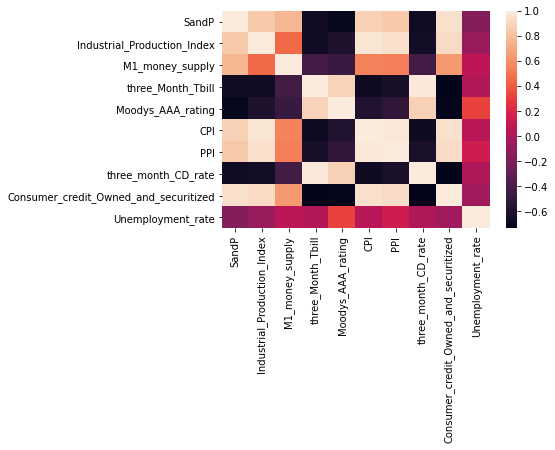

In [390]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [4]:
df.corr()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
SandP,1.000000,0.840426,0.768968,-0.658160,-0.702455,0.873418,0.838758,-0.653700,0.951414,-0.151703
Industrial_Production_Index,0.840426,1.000000,0.455151,-0.658125,-0.593308,0.971002,0.945858,-0.651450,0.919742,-0.065521
M1_money_supply,0.768968,0.455151,1.000000,-0.427800,-0.469998,0.550741,0.533774,-0.427154,0.639203,0.071993
three_Month_Tbill,-0.658160,-0.658125,-0.427800,1.000000,0.885171,-0.673230,-0.619055,0.992340,-0.732942,0.027790
Moodys_AAA_rating,-0.702455,-0.593308,-0.469998,0.885171,1.000000,-0.580509,-0.513843,0.873857,-0.716429,0.319427
CPI,0.873418,0.971002,0.550741,-0.673230,-0.580509,1.000000,0.986326,-0.669821,0.952290,0.058685
PPI,0.838758,0.945858,0.533774,-0.619055,-0.513843,0.986326,1.000000,-0.613962,0.931611,0.143217
three_month_CD_rate,-0.653700,-0.651450,-0.427154,0.992340,0.873857,-0.669821,-0.613962,1.000000,-0.722101,0.021415
Consumer_credit_Owned_and_securitized,0.951414,0.919742,0.639203,-0.732942,-0.716429,0.952290,0.931611,-0.722101,1.000000,-0.038154
Unemployment_rate,-0.151703,-0.065521,0.071993,0.027790,0.319427,0.058685,0.143217,0.021415,-0.038154,1.000000


In [391]:
df1 = df.drop(columns=['Dates'])
df1

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,86.12,30.422,160.7,3.81,4.43,31.280,31.8,4.13,87.183,4.9
1,86.75,30.611,160.9,3.93,4.41,31.280,31.9,4.19,88.152,5.1
2,86.83,31.016,161.5,3.93,4.42,31.310,31.9,4.27,88.916,4.7
3,87.97,31.151,162.0,3.93,4.43,31.380,32.0,4.28,90.047,4.8
4,89.28,31.394,161.7,3.89,4.44,31.480,32.1,4.32,90.886,4.6
...,...,...,...,...,...,...,...,...,...,...
675,4141.18,99.230,18915.7,0.02,2.90,266.832,217.9,0.11,4241.604,6.1
676,4167.85,99.850,19192.9,0.02,2.96,268.551,224.9,0.10,4276.989,5.8
677,4238.49,100.340,19238.2,0.04,2.79,270.981,228.5,0.09,4315.176,5.9
678,4363.71,101.187,19401.7,0.05,2.57,272.265,231.2,0.10,4332.450,5.4


In [124]:
Dates = df.Dates
SandP = df.SandP
IPI = df.Industrial_Production_Index
M1 = df.M1_money_supply
Tbill = df.three_Month_Tbill
AAA = df.Moodys_AAA_rating
CPI = df.CPI
PPI = df.PPI
CDrate = df.three_month_CD_rate
Credit = df.Consumer_credit_Owned_and_securitized
Unemp = df.Unemployment_rate

In [7]:
#plt.scatter(y=SandP,x=IPI)
#plt.show()

<AxesSubplot:>

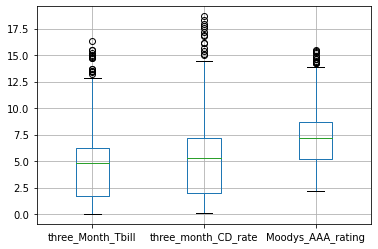

In [392]:
df.boxplot(column=['three_Month_Tbill','three_month_CD_rate','Moodys_AAA_rating'])

Text(0.5, 1.0, 'S&P 500')

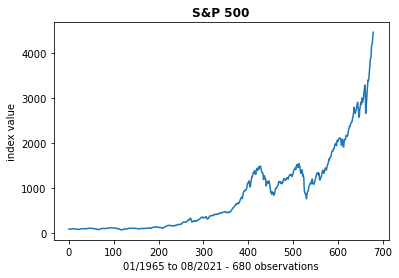

In [9]:
plt.plot(SandP)
plt.xlabel("01/1965 to 08/2021 - 680 observations")
plt.ylabel("index value")
plt.title("S&P 500", weight = "bold")

Text(0.5, 1.0, 'Consumer price index')

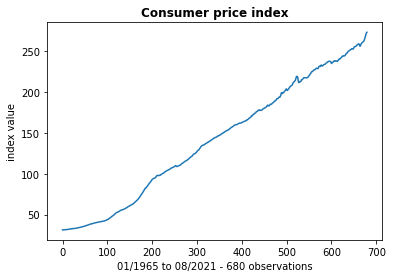

In [10]:
plt.plot(CPI)
plt.xlabel("01/1965 to 08/2021 - 680 observations")
plt.ylabel("index value")
plt.title("Consumer price index", weight = "bold")

Text(0.5, 1.0, 'Credit owned & securitized')

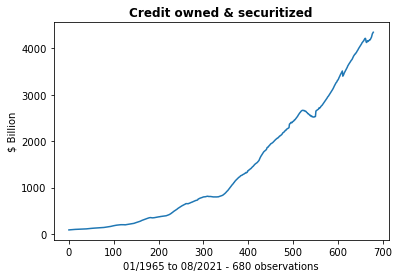

In [11]:
plt.plot(Credit)
plt.xlabel("01/1965 to 08/2021 - 680 observations")
plt.ylabel("$ Billion")
plt.title("Credit owned & securitized", weight = "bold")

In [12]:
#we'll pplot two or three variables and show that it is clearly visible that they all are non stationary time series
#so we'll directly compute first order differencing and then apply ADF test

### First order differencing

In [393]:
df2 = df1.diff()
df2

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.63,0.189,0.2,0.12,-0.02,0.000,0.1,0.06,0.969,0.2
2,0.08,0.405,0.6,0.00,0.01,0.030,0.0,0.08,0.764,-0.4
3,1.14,0.135,0.5,0.00,0.01,0.070,0.1,0.01,1.131,0.1
4,1.31,0.243,-0.3,-0.04,0.01,0.100,0.1,0.04,0.839,-0.2
...,...,...,...,...,...,...,...,...,...,...
675,230.67,0.068,246.3,-0.01,-0.14,2.039,2.9,0.01,18.714,0.1
676,26.67,0.620,277.2,0.00,0.06,1.719,7.0,-0.01,35.385,-0.3
677,70.64,0.490,45.3,0.02,-0.17,2.430,3.6,-0.01,38.187,0.1
678,125.22,0.847,163.5,0.01,-0.22,1.284,2.7,0.01,17.274,-0.5


In [394]:
df3 = df2.iloc[1: , :]
df3.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
1,0.63,0.189,0.2,0.12,-0.02,0.00,0.1,0.06,0.969,0.2
2,0.08,0.405,0.6,0.00,0.01,0.03,0.0,0.08,0.764,-0.4
3,1.14,0.135,0.5,0.00,0.01,0.07,0.1,0.01,1.131,0.1
4,1.31,0.243,-0.3,-0.04,0.01,0.10,0.1,0.04,0.839,-0.2
5,-4.24,0.244,0.5,-0.09,0.02,0.13,0.3,-0.01,0.944,0.0


Text(0.5, 1.0, 'CPI after differencing')

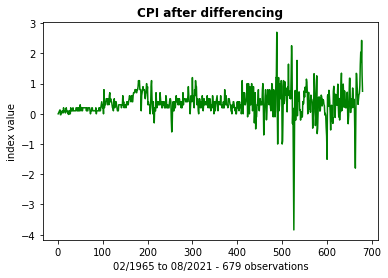

In [127]:
plt.plot(df2.CPI,color="green")
plt.xlabel("02/1965 to 08/2021 - 679 observations")
plt.ylabel("index value")
plt.title("CPI after differencing", weight = "bold")

Text(0.5, 1.0, 'Credit after differencing')

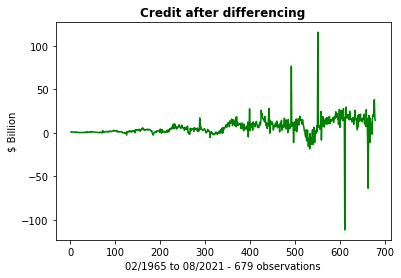

In [16]:
plt.plot(df2.Consumer_credit_Owned_and_securitized,color="green")
plt.xlabel("02/1965 to 08/2021 - 679 observations")
plt.ylabel("$ Billion")
plt.title("Credit after differencing", weight = "bold")

Text(0.5, 1.0, 'S&P 500 after differencing')

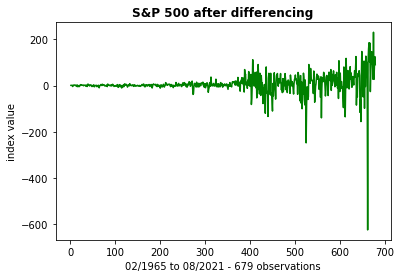

In [17]:
plt.plot(df2.SandP, color="green")
plt.xlabel("02/1965 to 08/2021 - 679 observations")
plt.ylabel("index value")
plt.title("S&P 500 after differencing", weight = "bold")

### Dickey Fuller test

In [18]:
#now we'll apply ADF test on this data

In [395]:
Z = df3["SandP"]
result = adfuller(Z)
Z1 = df3["Industrial_Production_Index"]
result1 = adfuller(Z1)
Z2 = df3["M1_money_supply"]
result2 = adfuller(Z2)
Z3 = df3["three_Month_Tbill"]
result3 = adfuller(Z3)
Z4 = df3["Moodys_AAA_rating"]
result4 = adfuller(Z4)
Z5 = df3["CPI"]
result5 = adfuller(Z5)
Z6 = df3["PPI"]
result6 = adfuller(Z6)
Z7 = df3["three_month_CD_rate"]
result7 = adfuller(Z7)
Z8 = df3["Consumer_credit_Owned_and_securitized"]
result8 = adfuller(Z8)
Z9 = df3["Unemployment_rate"]
result9 = adfuller(Z9)
print('p-value: %f' % result[1])
print()
print('p-value: %f' % result1[1])
print()
print('p-value: %f' % result2[1])
print()
print('p-value: %f' % result3[1])
print()
print('p-value: %f' % result4[1])
print()
print('p-value: %f' % result5[1])
print()
print('p-value: %f' % result6[1])
print()
print('p-value: %f' % result7[1])
print()
print('p-value: %f' % result8[1])
print()
print('p-value: %f' % result9[1])

p-value: 0.130492

p-value: 0.000000

p-value: 0.000000

p-value: 0.000000

p-value: 0.000000

p-value: 0.000457

p-value: 0.000000

p-value: 0.000001

p-value: 0.000033

p-value: 0.000000


In [20]:
#since p value of SandP is more than 5 percent, we fail to reject the null and the data is non stationary for SandP
#For independent variables, p value of all of them is coming out to be less than 5 percent, means they all are stationary 
#now compute second order differencing series for all dependent as well as independent variables

### Second order differencing

In [396]:
df4 = df3.diff()
df4.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,-0.1,0.02,-0.205,-0.6
3,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,0.1,-0.07,0.367,0.5
4,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.0,0.03,-0.292,-0.3
5,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,0.2,-0.05,0.105,0.2


In [397]:
df5 = df4.iloc[1: , :]
df5.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
2,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,-0.1,0.02,-0.205,-0.6
3,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,0.1,-0.07,0.367,0.5
4,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.0,0.03,-0.292,-0.3
5,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,0.2,-0.05,0.105,0.2
6,4.11,0.053,0.3,0.13,8.881784e-16,-0.16,-0.3,-0.01,-0.079,-0.2


In [398]:
df6 = df5.reset_index(drop=True)
df6

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,-0.55,0.216,0.4,-1.200000e-01,3.000000e-02,0.030,-0.1,2.000000e-02,-0.205,-0.6
1,1.06,-0.270,-0.1,0.000000e+00,0.000000e+00,0.040,0.1,-7.000000e-02,0.367,0.5
2,0.17,0.108,-0.8,-4.000000e-02,8.881784e-16,0.030,0.0,3.000000e-02,-0.292,-0.3
3,-5.55,0.001,0.8,-5.000000e-02,1.000000e-02,0.030,0.2,-5.000000e-02,0.105,0.2
4,4.11,0.053,0.3,1.300000e-01,8.881784e-16,-0.160,-0.3,-1.000000e-02,-0.079,-0.2
...,...,...,...,...,...,...,...,...,...,...
673,203.59,-2.697,-33.7,3.469447e-18,-4.800000e-01,0.407,-1.5,2.000000e-02,-0.672,0.3
674,-204.00,0.552,30.9,1.000000e-02,2.000000e-01,-0.320,4.1,-2.000000e-02,16.671,-0.4
675,43.97,-0.130,-231.9,2.000000e-02,-2.300000e-01,0.711,-3.4,-1.387779e-17,2.802,0.4
676,54.58,0.357,118.2,-1.000000e-02,-5.000000e-02,-1.146,-0.9,2.000000e-02,-20.913,-0.6


In [399]:
Z10 = df6["SandP"]
result10 = adfuller(Z10)
print('p-value: %f' % result10[1])

p-value: 0.000000


In [25]:
#we have got the p value of SnadP less than 5 percent, means the data is stationary now

Text(0.5, 1.0, 'S&P with Outliers')

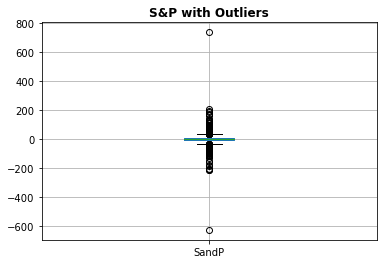

In [400]:
df6.boxplot(column=['SandP'])
plt.title("S&P with Outliers", weight = "bold")

<AxesSubplot:>

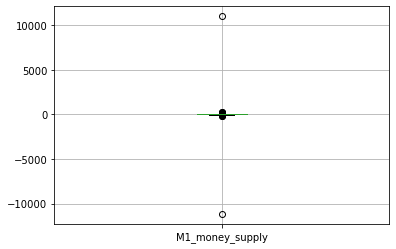

In [27]:
df6.boxplot(column=['M1_money_supply'])

<AxesSubplot:>

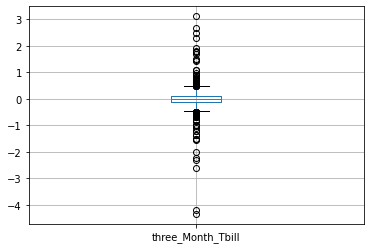

In [28]:
df6.boxplot(column=['three_Month_Tbill'])

<AxesSubplot:>

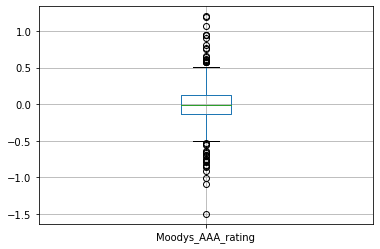

In [29]:
df6.boxplot(column=['Moodys_AAA_rating'])

<AxesSubplot:>

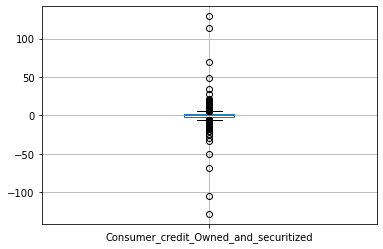

In [30]:
df6.boxplot(column=['Consumer_credit_Owned_and_securitized'])

<AxesSubplot:>

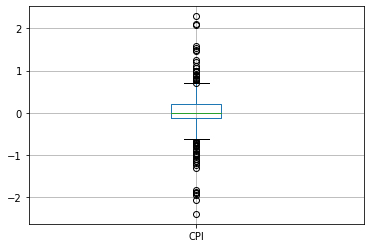

In [31]:
df6.boxplot(column=['CPI'])

<AxesSubplot:>

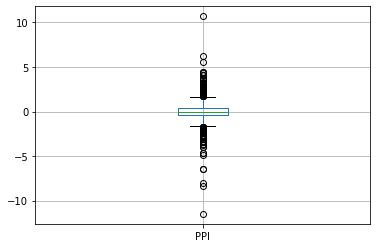

In [32]:
df6.boxplot(column=['PPI'])

<AxesSubplot:>

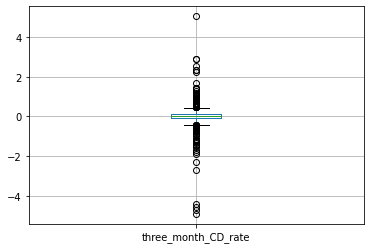

In [33]:
df6.boxplot(column=['three_month_CD_rate'])

<AxesSubplot:>

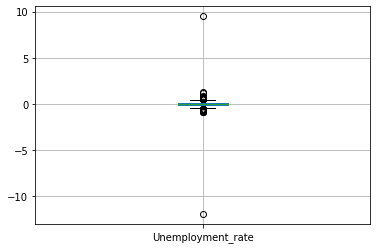

In [34]:
df6.boxplot(column=['Unemployment_rate'])

### Remove outliers

In [35]:
Dates = df.Dates
SandP = df.SandP
IPI = df.Industrial_Production_Index
M1 = df.M1_money_supply
Tbill = df.three_Month_Tbill
AAA = df.Moodys_AAA_rating
CPI = df.CPI
PPI = df.PPI
CDrate = df.three_month_CD_rate
Credit = df.Consumer_credit_Owned_and_securitized
Unemp = df.Unemployment_rate

In [401]:
print(df6.Unemployment_rate.idxmax())
print()
print(df6.Unemployment_rate.idxmin())
print()
print(df6.M1_money_supply.idxmax())
print()
print(df6.M1_money_supply.idxmin())
print()
print(df6.SandP.idxmax())
print()
print(df6.SandP.idxmin())
#https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/

661

662

662

663

661

660


In [402]:
df_6 = df6.drop([660, 661])
df_6

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,-0.55,0.216,0.4,-1.200000e-01,3.000000e-02,0.030,-0.1,2.000000e-02,-0.205,-0.6
1,1.06,-0.270,-0.1,0.000000e+00,0.000000e+00,0.040,0.1,-7.000000e-02,0.367,0.5
2,0.17,0.108,-0.8,-4.000000e-02,8.881784e-16,0.030,0.0,3.000000e-02,-0.292,-0.3
3,-5.55,0.001,0.8,-5.000000e-02,1.000000e-02,0.030,0.2,-5.000000e-02,0.105,0.2
4,4.11,0.053,0.3,1.300000e-01,8.881784e-16,-0.160,-0.3,-1.000000e-02,-0.079,-0.2
...,...,...,...,...,...,...,...,...,...,...
673,203.59,-2.697,-33.7,3.469447e-18,-4.800000e-01,0.407,-1.5,2.000000e-02,-0.672,0.3
674,-204.00,0.552,30.9,1.000000e-02,2.000000e-01,-0.320,4.1,-2.000000e-02,16.671,-0.4
675,43.97,-0.130,-231.9,2.000000e-02,-2.300000e-01,0.711,-3.4,-1.387779e-17,2.802,0.4
676,54.58,0.357,118.2,-1.000000e-02,-5.000000e-02,-1.146,-0.9,2.000000e-02,-20.913,-0.6


Text(0.5, 1.0, 'S&P without Outliers')

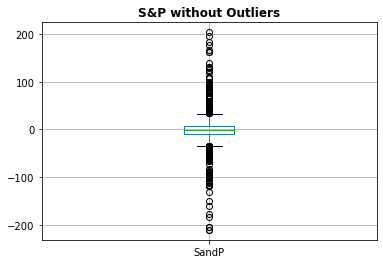

In [135]:
df_6.boxplot(column=['SandP'])
plt.title("S&P without Outliers", weight = "bold")

In [403]:
cols = df_6.columns
#column names stored in cols

In [405]:
x = cols[1:]
y = cols[0:1]
y = df_6[y]
x = df_6[x]

In [406]:
x.head()

,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,0.216,0.4,-0.12,3.000000e-02,0.03,-0.1,0.02,-0.205,-0.6
1,-0.270,-0.1,0.00,0.000000e+00,0.04,0.1,-0.07,0.367,0.5
2,0.108,-0.8,-0.04,8.881784e-16,0.03,0.0,0.03,-0.292,-0.3
3,0.001,0.8,-0.05,1.000000e-02,0.03,0.2,-0.05,0.105,0.2
4,0.053,0.3,0.13,8.881784e-16,-0.16,-0.3,-0.01,-0.079,-0.2


In [42]:
y.head()

,SandP
0,-0.55
1,1.06
2,0.17
3,-5.55
4,4.11


In [43]:
x.corr()

,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
Industrial_Production_Index,1.000000,0.336271,0.022986,0.103019,0.069882,0.098346,0.062251,0.153629,-0.608177
M1_money_supply,0.336271,1.000000,0.004929,0.079677,-0.004707,0.208606,-0.037780,0.033358,-0.584663
three_Month_Tbill,0.022986,0.004929,1.000000,0.471266,-0.010322,-0.006927,0.807244,0.013074,-0.025768
Moodys_AAA_rating,0.103019,0.079677,0.471266,1.000000,0.058895,0.090063,0.476227,0.051654,-0.116861
CPI,0.069882,-0.004707,-0.010322,0.058895,1.000000,0.602140,0.034903,0.159514,-0.129234
PPI,0.098346,0.208606,-0.006927,0.090063,0.602140,1.000000,-0.031752,0.146578,-0.269873
three_month_CD_rate,0.062251,-0.037780,0.807244,0.476227,0.034903,-0.031752,1.000000,0.004423,-0.013996
Consumer_credit_Owned_and_securitized,0.153629,0.033358,0.013074,0.051654,0.159514,0.146578,0.004423,1.000000,-0.177631
Unemployment_rate,-0.608177,-0.584663,-0.025768,-0.116861,-0.129234,-0.269873,-0.013996,-0.177631,1.000000


In [413]:
df_6.corr()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate,fitted y
SandP,1.000000,-0.100164,0.009323,0.023260,-0.064220,0.062195,0.064512,-0.054032,0.019217,-0.080471,0.253848
Industrial_Production_Index,-0.100164,1.000000,0.336271,0.022986,0.103019,0.069882,0.098346,0.062251,0.153629,-0.608177,-0.394581
M1_money_supply,0.009323,0.336271,1.000000,0.004929,0.079677,-0.004707,0.208606,-0.037780,0.033358,-0.584663,0.036728
three_Month_Tbill,0.023260,0.022986,0.004929,1.000000,0.471266,-0.010322,-0.006927,0.807244,0.013074,-0.025768,0.091629
Moodys_AAA_rating,-0.064220,0.103019,0.079677,0.471266,1.000000,0.058895,0.090063,0.476227,0.051654,-0.116861,-0.252985
CPI,0.062195,0.069882,-0.004707,-0.010322,0.058895,1.000000,0.602140,0.034903,0.159514,-0.129234,0.245007
PPI,0.064512,0.098346,0.208606,-0.006927,0.090063,0.602140,1.000000,-0.031752,0.146578,-0.269873,0.254137
three_month_CD_rate,-0.054032,0.062251,-0.037780,0.807244,0.476227,0.034903,-0.031752,1.000000,0.004423,-0.013996,-0.212853
Consumer_credit_Owned_and_securitized,0.019217,0.153629,0.033358,0.013074,0.051654,0.159514,0.146578,0.004423,1.000000,-0.177631,0.075704
Unemployment_rate,-0.080471,-0.608177,-0.584663,-0.025768,-0.116861,-0.129234,-0.269873,-0.013996,-0.177631,1.000000,-0.317004


### First Regression

In [140]:
model = ols('SandP ~ Industrial_Production_Index + M1_money_supply + three_Month_Tbill + Moodys_AAA_rating + CPI + PPI + three_month_CD_rate + Consumer_credit_Owned_and_securitized + Unemployment_rate',df_6).fit()
#we'll write the equation that we want

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SandP   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.097
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.10e-06
Time:                        13:22:32   Log-Likelihood:                -3510.7
No. Observations:                 676   AIC:                             7041.
Df Residuals:                     666   BIC:                             7087.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -0.1639      1.690     -0.097      0.923      -3.482       3.154
Industrial_Production_Index             -11.2568      2.425     -4.642      0.000     -16.018      -6.496
M1_money_supply                          -0.0048      0.004     -1.350      0.177      -0.012       0.002
three_Month_Tbill                        17.8090      5.867      3.035      0.002       6.289      29.329
Moodys_AAA_rating                       -13.9564      7.446     -1.874      0.061     -28.578       0.665
CPI                                       5.7818      4.914      1.177      0.240      -3.868      15.431
PPI                                       0.0142      1.524      0.009      0.993      -2.979       3.008
three_month_CD_rate                     -12.2393      4.775     -2.563      0.011     -21.616      -2.863
Consumer_credit_Owned_and_securitized     0.0158      0.150      0.105      0.916      -0.279       0.311
Unemployment_rate                       -21.9026      4.914     -4.457      0.000     -31.551     -12.254
==============================================================================
Omnibus:                       87.292   Durbin-Watson:                   2.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.726
Skew:                          -0.026   Prob(JB):                    1.11e-180
Kurtosis:                       8.424   Cond. No.                     2.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#p value of the vatiables should be less that 5 percent and t stats should be greater than 1.96
#r sq should be high
#all the assumptions should be correct - multicollinearity, autocorrelation, linearity and hateroskedasticity
#for multicillinearity we do not want VIF greater than 5
#variance of error terms should be constant
#linearity - reset test
#model should be general enough to work on out of sample data - Generalization
#autocorrelation means that y is dependent on its own past value
#multicollinearity means any two independent variable are highly correlated
#hateroskedascity - there should be a single constant variance in my model, means there should not be any correlation between error term and any independent vatriable. 
#if there is any correlation btw error and any independent variable, it means error is not purely random,  
# and it means error includes some independent variable that is not included in the model 
#problem of Hateroskedasticity means variance of error terms is not constant 

#Stepwise regression: 

#    remove problem of multicollinearity - removing correlated independent variables
#    variable selection - deciding important variables
#    removing the problem of autocorrelation
#    removing the problem of hateroskedcty
#    checking the accuracy of model

In [407]:
coefficient = model.params
coefficient

Intercept                                -0.163873
Industrial_Production_Index             -11.256825
M1_money_supply                          -0.004766
three_Month_Tbill                        17.809003
Moodys_AAA_rating                       -13.956366
CPI                                       5.781805
PPI                                       0.014192
three_month_CD_rate                     -12.239290
Consumer_credit_Owned_and_securitized     0.015771
Unemployment_rate                       -21.902579
dtype: float64

In [408]:
model.rsquared

0.0644389788742672

In [50]:
model.pvalues

Intercept                                0.922768
Industrial_Production_Index              0.000004
M1_money_supply                          0.177477
three_Month_Tbill                        0.002496
Moodys_AAA_rating                        0.061337
CPI                                      0.239803
PPI                                      0.992575
three_month_CD_rate                      0.010594
Consumer_credit_Owned_and_securitized    0.916467
Unemployment_rate                        0.000010
dtype: float64

In [409]:
forecasted_y = model.fittedvalues
forecasted_y

0       7.912539
1      -6.980113
2       4.284286
3      -4.799559
4       5.125572
         ...    
673    32.561186
674    -1.661329
675     1.316550
676     1.702103
677    -8.340670
Length: 676, dtype: float64

In [410]:
df_6.loc[:,'fitted y'] = forecasted_y
#adding predicted y in the last column of data
df_6.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,PPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate,fitted y
0,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,-0.1,0.02,-0.205,-0.6,7.912539
1,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,0.1,-0.07,0.367,0.5,-6.980113
2,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.0,0.03,-0.292,-0.3,4.284286
3,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,0.2,-0.05,0.105,0.2,-4.799559
4,4.11,0.053,0.3,0.13,8.881784e-16,-0.16,-0.3,-0.01,-0.079,-0.2,5.125572


In [53]:
#for Multicollinearity - we compute variance inflation factor, problem of multicollin inflates variance of error terms, but we want it to be low
#VIF above 5/10 is not acceptable
#VIF = 1/(1-r sq)
#for computing the VIF of all independent variables, we'll have to make them as dependent variavbles and run regression with other independent variables
#Industrial_Production_index ~ M1 + threemonth + .......
#then - M1_money_supply ~ Industrial_Production_index + three month + .......
# so, 9 VIFs will be calculated
#store all the VIFs in a table. Check maximum value of the table. 
#then delete the variable with VIF greater than 5
#again calculate VIF for the remaining 8 variables..and so on and on


#Then rerun the regression for all remaining independent variable by making them as dependent variable
#again repeat the above steps

In [54]:
type(cols)

pandas.core.indexes.base.Index

In [411]:
y.max()
forecasted_y.max()
y.min()
forecasted_y.min()

-83.27170128882543

Text(0.5, 1.0, 'Actual vs Predicted S&P')

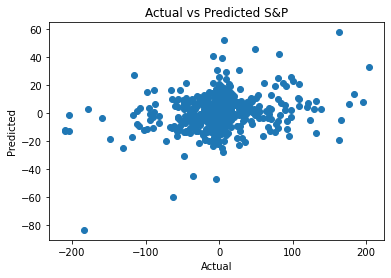

In [412]:
plt.scatter(y,forecasted_y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted S&P')


In [57]:

#https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/

In [58]:
#deleting extreme outliers only

In [59]:
#plt.plot(df6["CPI"])

In [60]:
#SandP stationary after second order differencing
#Industrial_Production_Index is stationary
#M1_money_supply is stationary
#three_Month_Tbill is stationary
#Moodys_AAA_rating is stationary
#CPI and PPI is stationary
#three_month_CD_rate is stationary
#Consumer_credit_Owned_and_securitized is stationary
#Unemployment_rate is stationary

# All indepoendent variavbles are stationary at first differencing only and only Dependent variable i.e. SandP is stationary
#after second order differencing

In [61]:
#For updating the master sheet - data = pd.concate([y,x],axis = 1)

### Important Variable Selection using Backward selection

In [147]:
p_value = list(model.pvalues)

In [148]:
model.pvalues

Intercept                                0.922768
Industrial_Production_Index              0.000004
M1_money_supply                          0.177477
three_Month_Tbill                        0.002496
Moodys_AAA_rating                        0.061337
CPI                                      0.239803
PPI                                      0.992575
three_month_CD_rate                      0.010594
Consumer_credit_Owned_and_securitized    0.916467
Unemployment_rate                        0.000010
dtype: float64

In [64]:
p_value    

[0.9227678446056008,
 4.152640876141203e-06,
 0.17747683683422943,
 0.0024961179772333753,
 0.061337221453206706,
 0.23980256613695808,
 0.9925747700033763,
 0.010594271410012948,
 0.9164671273115778,
 9.735090132266551e-06]

In [414]:
if max(p_value[1:]) > 0.05:
    max_value = df_6.columns[p_value.index(max(p_value[1:]))]
    print('Drop the variable ' + str(max_value))

Drop the variable PPI


In [415]:
df7 = df_6.drop(columns=['PPI','fitted y'])

In [416]:
df7.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate
0,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,0.02,-0.205,-0.6
1,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,-0.07,0.367,0.5
2,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.03,-0.292,-0.3
3,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,-0.05,0.105,0.2
4,4.11,0.053,0.3,0.13,8.881784e-16,-0.16,-0.01,-0.079,-0.2


In [152]:
model1 = ols('SandP ~ Industrial_Production_Index + M1_money_supply + three_Month_Tbill + Moodys_AAA_rating + CPI + three_month_CD_rate + Consumer_credit_Owned_and_securitized + Unemployment_rate',df7).fit()

In [417]:
forecasted_y1 = model1.fittedvalues
df7.loc[:,'fitted y1'] = forecasted_y1

In [418]:
df7.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,three_month_CD_rate,Consumer_credit_Owned_and_securitized,Unemployment_rate,fitted y1
0,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,0.02,-0.205,-0.6,7.917657
1,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,-0.07,0.367,0.5,-6.982639
2,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.03,-0.292,-0.3,4.286416
3,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,-0.05,0.105,0.2,-4.802702
4,4.11,0.053,0.3,0.13,8.881784e-16,-0.16,-0.01,-0.079,-0.2,5.126947


In [419]:
model1.pvalues

Intercept                                0.922694
Industrial_Production_Index              0.000004
M1_money_supply                          0.172879
three_Month_Tbill                        0.002433
Moodys_AAA_rating                        0.060588
CPI                                      0.138711
three_month_CD_rate                      0.010119
Consumer_credit_Owned_and_securitized    0.916043
Unemployment_rate                        0.000008
dtype: float64

In [155]:
p_value1 = list(model1.pvalues)
p_value1

[0.922693785408519,
 3.7206362235392354e-06,
 0.17287921602596573,
 0.0024334618161054133,
 0.0605875288145914,
 0.13871050902746226,
 0.01011861602383714,
 0.9160433274188873,
 7.930158033186416e-06]

In [156]:
cols1 = df7.columns
#redifining columns

In [420]:
x1 = cols1[1:]
y1 = cols1[0:1]
y1 = df7[y1]
x1 = df7[x1]
#redifining dependent and indenpendent variavbles for new data

In [421]:
if max(p_value1[1:]) > 0.05:
    max_value1 = cols1[p_value1.index(max(p_value1[1:]))]
    print('Drop the variable ' + str(max_value1))

Drop the variable Consumer_credit_Owned_and_securitized


In [422]:
df8 = df7.drop(columns=['Consumer_credit_Owned_and_securitized','fitted y1'])

model2 = ols('SandP ~ Industrial_Production_Index + M1_money_supply + three_Month_Tbill + Moodys_AAA_rating + CPI + three_month_CD_rate + Unemployment_rate',df8).fit()

In [423]:
forecasted_y2 = model2.fittedvalues
df8.loc[:,'fitted y2'] = forecasted_y2
df8.head()

,SandP,Industrial_Production_Index,M1_money_supply,three_Month_Tbill,Moodys_AAA_rating,CPI,three_month_CD_rate,Unemployment_rate,fitted y2
0,-0.55,0.216,0.4,-0.12,3.000000e-02,0.03,0.02,-0.6,7.960281
1,1.06,-0.270,-0.1,0.00,0.000000e+00,0.04,-0.07,0.5,-7.017797
2,0.17,0.108,-0.8,-0.04,8.881784e-16,0.03,0.03,-0.3,4.311541
3,-5.55,0.001,0.8,-0.05,1.000000e-02,0.03,-0.05,0.2,-4.813408
4,4.11,0.053,0.3,0.13,8.881784e-16,-0.16,-0.01,-0.2,5.134797


In [424]:
model2.pvalues

Intercept                      0.922965
Industrial_Production_Index    0.000004
M1_money_supply                0.168770
three_Month_Tbill              0.002387
Moodys_AAA_rating              0.060709
CPI                            0.131214
three_month_CD_rate            0.009907
Unemployment_rate              0.000006
dtype: float64

In [425]:
p_value2 = list(model2.pvalues)
cols2 = df8.columns

x2 = cols2[1:]
y2 = cols2[0:1]
y2 = df8[y2]
x2 = df8[x2]

if max(p_value2[1:]) > 0.05:
    max_value2 = cols2[p_value2.index(max(p_value2[1:]))]
    print('Drop the variable ' + str(max_value2))
else:
    print('No variable to be dropped')


Drop the variable M1_money_supply


In [163]:
df9 = df8.drop(columns=['M1_money_supply','fitted y2'])

model3 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + Moodys_AAA_rating + CPI + three_month_CD_rate + Unemployment_rate',df9).fit()

In [426]:
forecasted_y3 = model3.fittedvalues
df9.loc[:,'fitted y3'] = forecasted_y3
df9.head()

,SandP,Industrial_Production_Index,three_Month_Tbill,Moodys_AAA_rating,CPI,three_month_CD_rate,Unemployment_rate,fitted y3
0,-0.55,0.216,-0.12,3.000000e-02,0.03,0.02,-0.6,6.052422
1,1.06,-0.270,0.00,0.000000e+00,0.04,-0.07,0.5,-5.310740
2,0.17,0.108,-0.04,8.881784e-16,0.03,0.03,-0.3,3.396579
3,-5.55,0.001,-0.05,1.000000e-02,0.03,-0.05,0.2,-4.078397
4,4.11,0.053,0.13,8.881784e-16,-0.16,-0.01,-0.2,4.385856


In [427]:
model3.pvalues

Intercept                      0.947401
Industrial_Production_Index    0.000004
three_Month_Tbill              0.002853
Moodys_AAA_rating              0.052940
CPI                            0.099122
three_month_CD_rate            0.013106
Unemployment_rate              0.000009
dtype: float64

In [428]:
p_value3 = list(model3.pvalues)
cols3 = df9.columns

x3 = cols3[1:]
y3 = cols3[0:1]
y3 = df9[y3]
x3 = df9[x3]

if max(p_value3[1:]) > 0.05:
    max_value3 = cols3[p_value3.index(max(p_value3[1:]))]
    print('Drop the variable ' + str(max_value3))
else:
    print('No variable to be dropped')

Drop the variable CPI


In [429]:
max_value3

'CPI'

In [430]:
df9_1 = df9.drop(columns=['CPI','fitted y3'])

model3_1 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + Moodys_AAA_rating + three_month_CD_rate + Unemployment_rate',df9_1).fit()

In [431]:
model3_1.pvalues

Intercept                      0.954101
Industrial_Production_Index    0.000004
three_Month_Tbill              0.004206
Moodys_AAA_rating              0.062772
three_month_CD_rate            0.017664
Unemployment_rate              0.000004
dtype: float64

In [432]:
p_value_31 = list(model3_1.pvalues)
cols3_1 = df9_1.columns

x3_1 = cols3_1[1:]
y3_1 = cols3_1[0:1]
y3_1 = df9_1[y3_1]
x3_1 = df9_1[x3_1]

if max(p_value_31[1:]) > 0.05:
    max_value3_1 = cols3_1[p_value_31.index(max(p_value_31[1:]))]
    print('Drop the variable ' + str(max_value3_1))
else:
    print('No variable to be dropped')

Drop the variable Moodys_AAA_rating


In [433]:
df9_2 = df9_1.drop(columns=['Moodys_AAA_rating'])

model3_2 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate',df9_2).fit()

In [434]:
model3_2.pvalues

Intercept                      0.956373
Industrial_Production_Index    0.000003
three_Month_Tbill              0.009726
three_month_CD_rate            0.005888
Unemployment_rate              0.000007
dtype: float64

In [435]:
model3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SandP   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     9.399
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.14e-07
Time:                        18:46:21   Log-Likelihood:                -3514.8
No. Observations:                 676   AIC:                             7040.
Df Residuals:                     671   BIC:                             7062.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0927      1.693     -0.055      0.956      -3.417       3.232
Industrial_Production_Index   -11.3407      2.414     -4.697      0.000     -16.081      -6.600
three_Month_Tbill              14.9487      5.765      2.593      0.010       3.628      26.269
three_month_CD_rate           -12.8573      4.654     -2.763      0.006     -21.995      -3.720
Unemployment_rate             -18.6979      4.135     -4.522      0.000     -26.816     -10.580
==============================================================================
Omnibus:                       87.634   Durbin-Watson:                   2.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.177
Skew:                          -0.034   Prob(JB):                    2.67e-182
Kurtosis:                       8.448   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
df9_2

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.55,0.216,-1.200000e-01,2.000000e-02,-0.6
1,1.06,-0.270,0.000000e+00,-7.000000e-02,0.5
2,0.17,0.108,-4.000000e-02,3.000000e-02,-0.3
3,-5.55,0.001,-5.000000e-02,-5.000000e-02,0.2
4,4.11,0.053,1.300000e-01,-1.000000e-02,-0.2
...,...,...,...,...,...
673,203.59,-2.697,3.469447e-18,2.000000e-02,0.3
674,-204.00,0.552,1.000000e-02,-2.000000e-02,-0.4
675,43.97,-0.130,2.000000e-02,-1.387779e-17,0.4
676,54.58,0.357,-1.000000e-02,2.000000e-02,-0.6


In [437]:
cols3_2 = df9_2.columns

x3_2 = cols3_2[1:]
y3_2 = cols3_2[0:1]
y3_2 = df9_2[y3_2]
x3_2 = df9_2[x3_2]

### Multicollinearity Check

In [94]:
#now for calculating VIF, we'll add a constant to our independent variables data, i.e. an intercept

In [438]:
x_m = add_constant(x3_2)
cols_m = x_m.columns

In [439]:
vif_1 = [variance_inflation_factor(x_m.values,j) for j in range(x_m.shape[1])]

#storing in a variable - VIF
#https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
vif_1

[1.0009830073613823,
 1.6038546778075322,
 2.889548707788511,
 2.901249810736872,
 1.595488052863333]

In [440]:
vif_12 = vif_1[1:]
#the first VIF belongs to the constant

In [441]:
max(vif_12)

2.901249810736872

In [99]:
#Since maximum vif is less than 5 percent, it means that there is no variable with vif greater than 5 percent
#it means that there is no problem of multicollinearity in our data

### Autocorrelation check (Durbin Watson test)

In [100]:
#we will store the error terms in a variable - say 'error'
#store the lag1 term of the error - error_lag1, 
#the error term 'error' becomes the DEPENDENT variable, error lag 1 becomes independent variable and remaining independent variables are independent only
#then find p value
#if p value of error lag 1 is less than 5 percent, we reject the null and say that problem of autocorrelation exist 
#this is called the breusch godfrey test

In [442]:
durbin_watson(model3_2.resid)

2.812859807281086

In [102]:
#Since the DB watson test statistic is more than 2, it indicates negative autocorrelation

In [443]:
error = model3_2.resid
error

0       -7.175521
1        6.539626
2       -3.138259
3       -1.601849
4       -1.007771
          ...    
673    178.963401
674   -205.533093
675     49.768565
676     47.909159
677    -33.975605
Length: 676, dtype: float64

In [444]:
errorlag1 = error.shift(1)
errorlag1

0             NaN
1       -7.175521
2        6.539626
3       -3.138259
4       -1.601849
          ...    
673      0.935246
674    178.963401
675   -205.533093
676     49.768565
677     47.909159
Length: 676, dtype: float64

In [445]:
errorlag1[0] = 0
errorlag1

0        0.000000
1       -7.175521
2        6.539626
3       -3.138259
4       -1.601849
          ...    
673      0.935246
674    178.963401
675   -205.533093
676     49.768565
677     47.909159
Length: 676, dtype: float64

In [237]:
#x3_2.loc[:,'error'] = error
#x3_2.loc[:,'errorlag1'] = errorlag1
#loc function slices the data

In [446]:
x3_2.head()

,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,0.216,-0.12,0.02,-0.6
1,-0.270,0.00,-0.07,0.5
2,0.108,-0.04,0.03,-0.3
3,0.001,-0.05,-0.05,0.2
4,0.053,0.13,-0.01,-0.2


In [447]:
df9_3 = pd.concat([y3_2,x3_2],axis = 1)

In [448]:
df9_3.head()

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.55,0.216,-0.12,0.02,-0.6
1,1.06,-0.270,0.00,-0.07,0.5
2,0.17,0.108,-0.04,0.03,-0.3
3,-5.55,0.001,-0.05,-0.05,0.2
4,4.11,0.053,0.13,-0.01,-0.2


### Cochrane-Orcutt Procedure for treating Autocorrelation

In [449]:
model5 = ols('error ~ errorlag1',df9_3).fit()

In [450]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.28e-28
Time:                        18:48:37   Log-Likelihood:                -3453.6
No. Observations:                 676   AIC:                             6911.
Df Residuals:                     674   BIC:                             6920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0205      1.542      0.013      0.989      -3.008       3.049
errorlag1     -0.4073      0.035    -11.570      0.000      -0.476      -0.338
==============================================================================
Omnibus:                       90.715   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.812
Skew:                           0.079   Prob(JB):                    9.06e-197
Kurtosis:                       8.659   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# we get r = -0.4073

In [451]:
ytminus = y3_2.shift(1)
ytminus1 = ytminus.bfill()

xtminus = x3_2.shift(1)
xtminus1 = xtminus.bfill()

In [452]:
df10_1 = df9_3.drop(columns=['SandP','Industrial_Production_Index','three_Month_Tbill','three_month_CD_rate','Unemployment_rate'])

In [453]:
df10_1 = pd.concat([ytminus1,xtminus1],axis = 1)
df10_1

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.55,0.216,-1.200000e-01,2.000000e-02,-0.6
1,-0.55,0.216,-1.200000e-01,2.000000e-02,-0.6
2,1.06,-0.270,0.000000e+00,-7.000000e-02,0.5
3,0.17,0.108,-4.000000e-02,3.000000e-02,-0.3
4,-5.55,0.001,-5.000000e-02,-5.000000e-02,0.2
...,...,...,...,...,...
673,-62.60,5.776,3.000000e-02,2.000000e-02,-0.1
674,203.59,-2.697,3.469447e-18,2.000000e-02,0.3
675,-204.00,0.552,1.000000e-02,-2.000000e-02,-0.4
676,43.97,-0.130,2.000000e-02,-1.387779e-17,0.4


In [259]:
#cols5 = df10.columns

#x5 = cols5[1:5]
#y5 = cols5[0:1]
#y5 = df10[y5]
#x5 = df10[x5]

In [260]:
#x5.loc[:,'ytminus1'] = ytminus1
#df10 = pd.concat([y5,x5],axis = 1)
#ytminus1

In [454]:
r_ytminus1 = (-0.4073)*df10_1['SandP']
r_IPI = (-0.4073)*df10_1['Industrial_Production_Index']
r_tbill = (-0.4073)*df10_1['three_Month_Tbill']
r_cd = (-0.4073)*df10_1['three_month_CD_rate']
r_unemp = (-0.4073)*df10_1['Unemployment_rate']

In [455]:
transformed_y3_2 = df9_3['SandP'] - r_ytminus1
transformed_IPI = df9_3['Industrial_Production_Index'] - r_IPI
transformed_tbill = df9_3['three_Month_Tbill'] - r_tbill
transformed_cd = df9_3['three_month_CD_rate'] - r_cd
transformed_un = df9_3['Unemployment_rate'] - r_unemp

In [456]:
df10_2 = pd.concat([transformed_y3_2,transformed_IPI, transformed_tbill, transformed_cd,transformed_un],axis = 1)

In [457]:
df10_2.head()

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781
4,1.849485,0.053407,0.109635,-0.030365,-0.11854


In [458]:
model5_1 = ols('transformed_y3_2 ~ transformed_IPI + transformed_tbill + transformed_cd + transformed_un',df10_2).fit()
model5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       transformed_y3_2   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     7.262
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           9.97e-06
Time:                        18:54:21   Log-Likelihood:                -3453.0
No. Observations:                 676   AIC:                             6916.
Df Residuals:                     671   BIC:                             6939.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0676      1.546     -0.044      0.965      -3.103       2.968
transformed_IPI      -9.6982      2.536     -3.824      0.000     -14.678      -4.718
transformed_tbill    17.7724      5.845      3.041      0.002       6.296      29.249
transformed_cd      -15.6956      4.738     -3.313      0.001     -24.999      -6.393
transformed_un      -14.7124      4.217     -3.489      0.001     -22.992      -6.433
==============================================================================
Omnibus:                       91.732   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.206
Skew:                           0.060   Prob(JB):                    1.13e-204
Kurtosis:                       8.773   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
#Since Durbin watson statistic is now close to 2, we can say that autocorrelation problem has been removed by some extent

### Autoregressive model for correcting autocorrelation

In [277]:
#model6 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + ytminus1',df10).fit()

In [ ]:
#model6.pvalues

In [278]:
#durbin_watson(model6.resid)

In [279]:
#since p value of ytminus1 is less than 5 percent, it means that is a significant indpendent variable

### Linearity Test

In [ ]:
#error1 = model6.resid
#error1lag1 = error1.shift(1)
#error1lag1[0] = 0

In [ ]:
#introduce x6 and y6 and then add error variables in it

In [514]:
df12 = df10_2 + 0

In [515]:
cols6 = df12.columns

x6 = cols6[1:]
y6 = cols6[0:1]
y6 = df12[y6]
x6 = df12[x6]

In [510]:
#ytminus_y6 = y6.shift(1)
#ytminus1_y6 = ytminus_y6.bfill()
#ytminus1_y6

In [516]:
df12 = pd.concat([y6,x6],axis = 1)
#add ytminus1 column also to df12
#df12.head()

In [283]:
#model7 = ols('error1 ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + ytminus1_y6 + error1lag1',df12).fit()
#model7.pvalues

In [324]:
#the p value of error1lag1 is less than 5 percent, it means the problem of autocorrelation is still there. 

In [517]:
df12

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781
4,1.849485,0.053407,0.109635,-0.030365,-0.11854
...,...,...,...,...,...
673,178.093020,-0.344435,0.012219,0.028146,0.25927
674,-121.077793,-0.546488,0.010000,-0.011854,-0.27781
675,-39.119200,0.094830,0.024073,-0.008146,0.23708
676,72.488981,0.304051,-0.001854,0.020000,-0.43708


In [284]:
# the dependent and independent variable should be linearly related
#Now I'll go back to regression equation only with ytminus1 as x variable and take out its fitted values
#take their square and add that variable as x and regress again with additional x variables - ytminus1 and fittedsquare

In [472]:
forecasted_y_5_1 = model5_1.fittedvalues

Text(0.5, 1.0, 'Actual vs Predicted S&P')

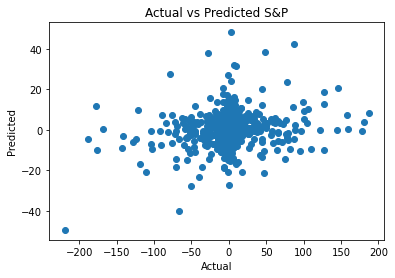

In [551]:
plt.scatter(transformed_y3_2,forecasted_y_5_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted S&P')

In [552]:
model5_1.pvalues

Intercept            0.965131
transformed_IPI      0.000144
transformed_tbill    0.002452
transformed_cd       0.000973
transformed_un       0.000516
dtype: float64

In [ ]:
#Since the plots are not scattered around a 45 degree line, there is a problem of linear relationship in our data

In [ ]:
#df10_2 is the final dataframe to be worked on

### Polynomial regression for correcting Non Linear relationship

In [518]:
Industrial_Production_Index2 = df12['Industrial_Production_Index'] ** 2
three_Month_Tbill2 = df12['three_Month_Tbill'] ** 2
three_month_CD_rate2 = df12['three_month_CD_rate'] ** 2
Unemployment_rate2 = df12['Unemployment_rate'] ** 2

In [519]:
df13 = df12 + 0

cols8 = df13.columns
df13

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781
4,1.849485,0.053407,0.109635,-0.030365,-0.11854
...,...,...,...,...,...
673,178.093020,-0.344435,0.012219,0.028146,0.25927
674,-121.077793,-0.546488,0.010000,-0.011854,-0.27781
675,-39.119200,0.094830,0.024073,-0.008146,0.23708
676,72.488981,0.304051,-0.001854,0.020000,-0.43708


In [520]:


x8 = cols8[1:]
y8 = cols8[0:1]
y8 = df13[y8]
x8 = df13[x8]

x8.loc[:,'Industrial_Production_Index2'] = Industrial_Production_Index2
x8.loc[:,'three_Month_Tbill2'] = three_Month_Tbill2
x8.loc[:,'three_month_CD_rate2'] = three_month_CD_rate2
x8.loc[:,'Unemployment_rate2'] = Unemployment_rate2


df13 = pd.concat([y8,x8],axis = 1)

In [521]:
df13.head()

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate,Industrial_Production_Index2,three_Month_Tbill2,three_month_CD_rate2,Unemployment_rate2
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438,0.092402,0.028519,0.000792,0.712978
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562,0.033132,0.002389,0.003826,0.065342
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635,0.000004,0.001600,0.000002,0.009283
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781,0.002024,0.004395,0.001427,0.006054
4,1.849485,0.053407,0.109635,-0.030365,-0.11854,0.002852,0.012020,0.000922,0.014052


In [522]:
model9 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + Industrial_Production_Index2 + three_Month_Tbill2 + three_month_CD_rate2 + Unemployment_rate2',df13).fit()

In [523]:
model9.pvalues

Intercept                       0.776631
Industrial_Production_Index     0.001453
three_Month_Tbill               0.002839
three_month_CD_rate             0.001360
Unemployment_rate               0.003718
Industrial_Production_Index2    0.176981
three_Month_Tbill2              0.931680
three_month_CD_rate2            0.904446
Unemployment_rate2              0.429704
dtype: float64

In [524]:
p_value5 = list(model9.pvalues)
df14 = df13 + 0
cols9 = df14.columns

In [525]:
max_value5 = cols9[p_value5.index(max(p_value5[1:]))]

In [526]:
if max(p_value5[1:]) > 0.05:
    max_value5 = cols9[p_value5.index(max(p_value5[1:]))]
    print('Drop the variable ' + str(max_value5))

Drop the variable three_Month_Tbill2


In [527]:
df15 = df14.drop(columns=['three_Month_Tbill2'])

In [531]:
model10 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + Industrial_Production_Index2 + three_month_CD_rate2 + Unemployment_rate2',df15).fit()

In [532]:
model10.pvalues

Intercept                       0.781205
Industrial_Production_Index     0.001445
three_Month_Tbill               0.002799
three_month_CD_rate             0.001175
Unemployment_rate               0.003652
Industrial_Production_Index2    0.177107
three_month_CD_rate2            0.677065
Unemployment_rate2              0.430871
dtype: float64

In [533]:
p_value6 = list(model10.pvalues)
df16 = df15 + 0
cols10 = df16.columns

if max(p_value6[1:]) > 0.05:
    max_value6 = cols10[p_value6.index(max(p_value6[1:]))]
    print('Drop the variable ' + str(max_value6))

Drop the variable three_month_CD_rate2


In [535]:
df16_1 = df16.drop(columns=['three_month_CD_rate2'])

model11 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + Industrial_Production_Index2 + Unemployment_rate2',df16_1).fit()

In [536]:
p_value7 = list(model11.pvalues)
df17 = df16_1 + 0
cols11 = df17.columns

if max(p_value7[1:]) > 0.05:
    max_value7 = cols11[p_value7.index(max(p_value7[1:]))]
    print('Drop the variable ' + str(max_value7))

Drop the variable Unemployment_rate2


In [538]:
df17_1 = df17.drop(columns=['Unemployment_rate2'])

model12 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate + Industrial_Production_Index2',df17_1).fit()

In [540]:
model12.pvalues

Intercept                       0.911604
Industrial_Production_Index     0.001060
three_Month_Tbill               0.002359
three_month_CD_rate             0.000772
Unemployment_rate               0.002148
Industrial_Production_Index2    0.189630
dtype: float64

In [542]:
p_value8 = list(model12.pvalues)
df18 = df17_1 + 0
cols12 = df18.columns

if max(p_value8[1:]) > 0.05:
    max_value8 = cols12[p_value8.index(max(p_value8[1:]))]
    print('Drop the variable ' + str(max_value8))
else:
    print('No valriable to be dropped')

Drop the variable Industrial_Production_Index2


In [544]:
df19 = df18.drop(columns=['Industrial_Production_Index2'])

model12_1 = ols('SandP ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate',df19).fit()

In [545]:
model12_1.pvalues

Intercept                      0.965131
Industrial_Production_Index    0.000144
three_Month_Tbill              0.002452
three_month_CD_rate            0.000973
Unemployment_rate              0.000516
dtype: float64

In [546]:
df19

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781
4,1.849485,0.053407,0.109635,-0.030365,-0.11854
...,...,...,...,...,...
673,178.093020,-0.344435,0.012219,0.028146,0.25927
674,-121.077793,-0.546488,0.010000,-0.011854,-0.27781
675,-39.119200,0.094830,0.024073,-0.008146,0.23708
676,72.488981,0.304051,-0.001854,0.020000,-0.43708


In [ ]:
#now we can see that there is no variable to drop anymore

In [547]:
fitted_model12_1 = model12_1.fittedvalues

In [548]:
df19.loc[:,'fitted model12_1'] = fitted_model12_1

Text(0.5, 1.0, 'Actual vs Predicted S&P')

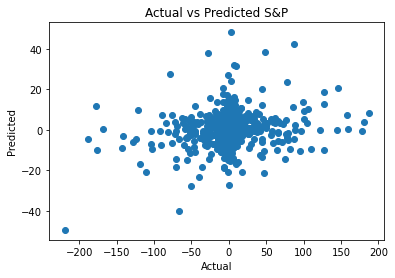

In [550]:
plt.scatter(df19.SandP,fitted_model12_1)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted S&P')

### Hateroskedasticity check - Breusch pagan test

In [563]:
#Error terms should have a constant variance
#If chi sq statistic is less than chi sq critical, then there is no problem of hateroskedasticity


In [571]:
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(model12_1.resid, model12_1.model.exog)
lzip(names, test)

#https://www.statology.org/breusch-pagan-test-python/

[('Lagrange multiplier statistic', 2.750923557231835),
 ('p-value', 0.6003335107599259),
 ('f-value', 0.6854334344784908),
 ('f p-value', 0.6021950567555951)]

In [559]:
error2 = model12_1.resid
error2sq = model12_1.resid ** 2

df20 = df19 + 0
df20.loc[:,'error2sq'] = error2sq
df20.head()

,SandP,Industrial_Production_Index,three_Month_Tbill,three_month_CD_rate,Unemployment_rate,fitted model12_1,error2sq
0,-0.774015,0.303977,-0.168876,0.028146,-0.84438,5.964109,45.402314
1,0.835985,-0.182023,-0.048876,-0.061854,0.25562,-1.960894,7.822532
2,0.601738,-0.001971,-0.040000,0.001489,-0.09635,0.634784,0.001092
3,-5.480759,0.044988,-0.066292,-0.037781,0.07781,-2.233847,10.542439
4,1.849485,0.053407,0.109635,-0.030365,-0.11854,3.583520,3.006876


In [554]:
model13 = ols('error2sq ~ Industrial_Production_Index + three_Month_Tbill + three_month_CD_rate + Unemployment_rate',df20).fit()

In [555]:
df20.SandP.count()

676

In [556]:
chi_sq_stats = df20.SandP.count()*model13.rsquared
chi_sq_stats

2.750923557231835

In [560]:
chi_critical = chi2.isf(q=0.05, df = 1)
chi_critical

3.8414588206941285

In [ ]:
#since chi_sq_stats is less than chi_critical, out model is not hateroskedastic, our model is fine

### Error terms should be normally distributed

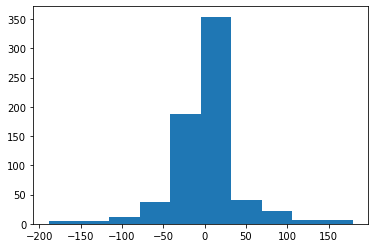

In [572]:
plt.hist(error2)
plt.show()

### Principal Component Analysis

In [ ]:
cols_1 = df.columns

y_1 = cols[1]
y_1 = df[y_1]
x_1 = cols[2:11]
x_1 = df[x_1]

In [ ]:
X_std = StandardScaler().fit_transform(x_1)
pca = PCA().fit(X_std)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
#cumulative contributions - obviously this will add up to 1 in the end

In [ ]:
pca.explained_variance_ratio_
#individual contributions

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

In [ ]:
X_pca_with_constant = sm.add_constant(X_pca)
model14 = sm.OLS(y_1,X_pca_with_constant)

In [ ]:
results14 = model14.fit()
print(results14.summary())

In [ ]:
#https://www.youtube.com/watch?v=7A6vukBvooE
#https://github.com/bhattbhavesh91/pca-multicollinearity/blob/master/multi-collinearity-pca-notebook.ipynb